In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import re

from shapely.geometry import Point
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

import numpy as np

# read in houses for sale & show DF

In [ ]:
houses = pd.read_csv("all_houses_2")
houses

In [3]:
houses.to_csv("houses_2.csv", index = False)

# read in schools - name, rating, size, grades, type, etc. & show DF

In [4]:
schools = pd.read_csv("each_house_2")
schools

,Unnamed: 0,link,rating,totalCount,distance,assigned,name,studentsPerTeacher,isAssigned,size,level,grades,type,zpid
0,0,https://www.greatschools.org/school?id=01074&s...,2,2,1.4,NaN,Dupont Tyler Middle School,18,True,590,Elementary,5-8,Public,41108405
1,1,https://www.greatschools.org/school?id=01121&s...,3,1,5.4,NaN,Mcgavock Comp High School,18,True,2292,Middle,8-12,Public,41108405
2,0,https://www.greatschools.org/school?id=01052&s...,2,1,1.8,NaN,Mckissack Middle School,14,True,308,Elementary,5-8,Public,41112643
3,1,https://www.greatschools.org/school?id=01158&s...,2,1,2.8,NaN,Pearl Cohn Magnet High School,13,True,588,High,9-12,Public,41112643
4,0,https://www.greatschools.org/school?id=01125&s...,5,1,2.4,NaN,John T. Moore Middle School,17,True,760,Elementary,5-8,Public,67620536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,1,https://www.greatschools.org/school?id=01121&s...,3,1,2.7,NaN,Mcgavock Comp High School,18,True,2292,Middle,8-12,Public,2073572052
518,0,https://www.greatschools.org/school?id=01052&s...,2,1,0.9,NaN,Mckissack Middle School,14,True,308,Elementary,5-8,Public,41116727
519,1,https://www.greatschools.org/school?id=01158&s...,2,1,0.5,NaN,Pearl Cohn Magnet High School,13,True,588,High,9-12,Public,41116727
520,0,https://www.greatschools.org/school?id=02201&s...,3,2,0.6,NaN,John Early Paideia Middle Magnet,14,True,275,Elementary,5-8,Public,41098072


In [5]:
schools.to_csv("schools_2.csv", index = False)

# merge houses and schools DF's

In [6]:
houses_and_schools = (pd.merge(houses, schools, on = 'zpid'))

In [7]:
houses_and_schools

,Unnamed: 0_x,dateSold,propertyType,lotAreaValue,address,daysOnZillow,price,listingDateTime,longitude,latitude,...,totalCount,distance,assigned,name,studentsPerTeacher,isAssigned,size,level,grades,type
0,is_FSBA,NaN,SINGLE_FAMILY,1.46,"1015 Tulip Grove Rd, Hermitage, TN 37076",-1,425000,NaN,-86.59299,36.187960,...,2,1.4,NaN,Dupont Tyler Middle School,18,True,590,Elementary,5-8,Public
1,is_FSBA,NaN,SINGLE_FAMILY,1.46,"1015 Tulip Grove Rd, Hermitage, TN 37076",-1,425000,NaN,-86.59299,36.187960,...,1,5.4,NaN,Mcgavock Comp High School,18,True,2292,Middle,8-12,Public
2,is_FSBA,NaN,SINGLE_FAMILY,6969.60,"5902 Morrow Rd, Nashville, TN 37209",-1,499900,NaN,-86.85982,36.161920,...,1,1.8,NaN,Mckissack Middle School,14,True,308,Elementary,5-8,Public
3,is_FSBA,NaN,SINGLE_FAMILY,6969.60,"5902 Morrow Rd, Nashville, TN 37209",-1,499900,NaN,-86.85982,36.161920,...,1,2.8,NaN,Pearl Cohn Magnet High School,13,True,588,High,9-12,Public
4,is_FSBA,NaN,SINGLE_FAMILY,1.50,"112 High Estes, Nashville, TN 37215",-1,3390000,NaN,-86.84064,36.091423,...,1,2.4,NaN,John T. Moore Middle School,17,True,760,Elementary,5-8,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,is_newHome,NaN,SINGLE_FAMILY,NaN,"The Brookemeade Plan, Parkhaven",-1,549990,NaN,-86.63733,36.195103,...,1,2.7,NaN,Mcgavock Comp High School,18,True,2292,Middle,8-12,Public
580,is_FSBA,NaN,SINGLE_FAMILY,0.25,"2710 Delaware Ave, Nashville, TN 37209",-1,775000,NaN,-86.81773,36.156563,...,1,0.9,NaN,Mckissack Middle School,14,True,308,Elementary,5-8,Public
581,is_FSBA,NaN,SINGLE_FAMILY,0.25,"2710 Delaware Ave, Nashville, TN 37209",-1,775000,NaN,-86.81773,36.156563,...,1,0.5,NaN,Pearl Cohn Magnet High School,13,True,588,High,9-12,Public
582,is_FSBA,NaN,SINGLE_FAMILY,8276.40,"1742 17th Ave N, Nashville, TN 37208",-1,975000,NaN,-86.81030,36.179546,...,2,0.6,NaN,John Early Paideia Middle Magnet,14,True,275,Elementary,5-8,Public


# cleaning DF; removing unnecessary columns


In [8]:
del houses_and_schools['daysOnZillow']

In [9]:
del houses_and_schools['listingDateTime']

In [10]:
del houses_and_schools['contingentListingType']

In [11]:
print(houses_and_schools.columns.tolist())

['Unnamed: 0_x', 'dateSold', 'propertyType', 'lotAreaValue', 'address', 'price', 'longitude', 'latitude', 'listingStatus', 'zpid', 'listingSubType', 'imgSrc', 'livingArea', 'bathrooms', 'lotAreaUnit', 'country', 'currency', 'bedrooms', 'hasImage', 'Unnamed: 0_y', 'link', 'rating', 'totalCount', 'distance', 'assigned', 'name', 'studentsPerTeacher', 'isAssigned', 'size', 'level', 'grades', 'type']


In [12]:
del houses_and_schools['currency']

In [13]:
del houses_and_schools['dateSold']

In [14]:
print(houses_and_schools.columns.tolist())

['Unnamed: 0_x', 'propertyType', 'lotAreaValue', 'address', 'price', 'longitude', 'latitude', 'listingStatus', 'zpid', 'listingSubType', 'imgSrc', 'livingArea', 'bathrooms', 'lotAreaUnit', 'country', 'bedrooms', 'hasImage', 'Unnamed: 0_y', 'link', 'rating', 'totalCount', 'distance', 'assigned', 'name', 'studentsPerTeacher', 'isAssigned', 'size', 'level', 'grades', 'type']


In [15]:
houses_and_schools['zip'] = houses_and_schools['address'].str.extract(r'(\d{5}\-?\d{0,4})')

In [16]:
#zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [17]:
#houses_and_schools['zip'] = houses_and_schools['address'].str.extract(r'(\d{5}\-?\d{0,4})')

# creating 'work' copy


In [18]:
work = houses_and_schools.copy()

In [19]:
work['zip'] = work['address'].str.extract(r'(\d{5}\-?\d{0,4})')

In [20]:
work

,Unnamed: 0_x,propertyType,lotAreaValue,address,price,longitude,latitude,listingStatus,zpid,listingSubType,...,distance,assigned,name,studentsPerTeacher,isAssigned,size,level,grades,type,zip
0,is_FSBA,SINGLE_FAMILY,1.46,"1015 Tulip Grove Rd, Hermitage, TN 37076",425000,-86.59299,36.187960,FOR_SALE,41108405,True,...,1.4,NaN,Dupont Tyler Middle School,18,True,590,Elementary,5-8,Public,37076
1,is_FSBA,SINGLE_FAMILY,1.46,"1015 Tulip Grove Rd, Hermitage, TN 37076",425000,-86.59299,36.187960,FOR_SALE,41108405,True,...,5.4,NaN,Mcgavock Comp High School,18,True,2292,Middle,8-12,Public,37076
2,is_FSBA,SINGLE_FAMILY,6969.60,"5902 Morrow Rd, Nashville, TN 37209",499900,-86.85982,36.161920,FOR_SALE,41112643,True,...,1.8,NaN,Mckissack Middle School,14,True,308,Elementary,5-8,Public,37209
3,is_FSBA,SINGLE_FAMILY,6969.60,"5902 Morrow Rd, Nashville, TN 37209",499900,-86.85982,36.161920,FOR_SALE,41112643,True,...,2.8,NaN,Pearl Cohn Magnet High School,13,True,588,High,9-12,Public,37209
4,is_FSBA,SINGLE_FAMILY,1.50,"112 High Estes, Nashville, TN 37215",3390000,-86.84064,36.091423,FOR_SALE,67620536,True,...,2.4,NaN,John T. Moore Middle School,17,True,760,Elementary,5-8,Public,37215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,is_newHome,SINGLE_FAMILY,NaN,"The Brookemeade Plan, Parkhaven",549990,-86.63733,36.195103,FOR_SALE,2073572052,True,...,2.7,NaN,Mcgavock Comp High School,18,True,2292,Middle,8-12,Public,NaN
580,is_FSBA,SINGLE_FAMILY,0.25,"2710 Delaware Ave, Nashville, TN 37209",775000,-86.81773,36.156563,FOR_SALE,41116727,True,...,0.9,NaN,Mckissack Middle School,14,True,308,Elementary,5-8,Public,37209
581,is_FSBA,SINGLE_FAMILY,0.25,"2710 Delaware Ave, Nashville, TN 37209",775000,-86.81773,36.156563,FOR_SALE,41116727,True,...,0.5,NaN,Pearl Cohn Magnet High School,13,True,588,High,9-12,Public,37209
582,is_FSBA,SINGLE_FAMILY,8276.40,"1742 17th Ave N, Nashville, TN 37208",975000,-86.81030,36.179546,FOR_SALE,41098072,True,...,0.6,NaN,John Early Paideia Middle Magnet,14,True,275,Elementary,5-8,Public,37208


In [21]:
del work['Unnamed: 0_x']

In [22]:
zipcodes = gpd.read_file('../Notebooks/Zip_Codes_3.geojson')

In [23]:
zipcodes

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37221,17,NASHVILLE,241372.31126936738,1266395059.4885921,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
1,37214,6,NASHVILLE,165410.80552042887,674068994.30004752,"MULTIPOLYGON (((-86.65585 36.11824, -86.66410 ..."
2,37204,9,NASHVILLE,93180.292250554368,200664795.51816273,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37015,20,ASHLAND CITY,144497.88069816498,260003984.10646179,"MULTIPOLYGON (((-86.92773 36.28074, -86.92769 ..."
4,37232,35,NASHVILLE,9914.0803317846021,2392242.1327489368,"MULTIPOLYGON (((-86.79984 36.14507, -86.80037 ..."
5,37027,43,BRENTWOOD,1235.5221063552215,38954.521393012154,"MULTIPOLYGON (((-86.73108 36.00985, -86.73153 ..."
6,37205,16,NASHVILLE,146801.80831501028,400978073.01062751,"MULTIPOLYGON (((-86.81907 36.13351, -86.81688 ..."
7,37152,19,RIDGETOP,7522.8191724633934,2363749.2934113713,"MULTIPOLYGON (((-86.75775 36.39996, -86.75773 ..."
8,37217,56,NASHVILLE,179866.56848008142,517579208.09202528,"MULTIPOLYGON (((-86.67355 36.12729, -86.66687 ..."
9,37064,18,FRANKLIN,28995.828320642479,46969608.006199107,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


# joining 'work' and 'zipcodes' DF's
    

In [24]:
work_zipcodes = (pd.merge(work, zipcodes, on = 'zip'))
#houses_and_schools = (pd.merge(houses, schools, on = 'zpid'))

In [25]:
work_zipcodes

,propertyType,lotAreaValue,address,price,longitude,latitude,listingStatus,zpid,listingSubType,imgSrc,...,size,level,grades,type,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,SINGLE_FAMILY,1.46,"1015 Tulip Grove Rd, Hermitage, TN 37076",425000,-86.592990,36.187960,FOR_SALE,41108405,True,https://photos.zillowstatic.com/fp/27e81f348a5...,...,590,Elementary,5-8,Public,37076,52,HERMITAGE,3786.709805097858,675823.34769238275,"MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ..."
1,SINGLE_FAMILY,1.46,"1015 Tulip Grove Rd, Hermitage, TN 37076",425000,-86.592990,36.187960,FOR_SALE,41108405,True,https://photos.zillowstatic.com/fp/27e81f348a5...,...,590,Elementary,5-8,Public,37076,53,HERMITAGE,291751.4283260752,983805973.83156168,"MULTIPOLYGON (((-86.57085 36.13534, -86.57099 ..."
2,SINGLE_FAMILY,1.46,"1015 Tulip Grove Rd, Hermitage, TN 37076",425000,-86.592990,36.187960,FOR_SALE,41108405,True,https://photos.zillowstatic.com/fp/27e81f348a5...,...,2292,Middle,8-12,Public,37076,52,HERMITAGE,3786.709805097858,675823.34769238275,"MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ..."
3,SINGLE_FAMILY,1.46,"1015 Tulip Grove Rd, Hermitage, TN 37076",425000,-86.592990,36.187960,FOR_SALE,41108405,True,https://photos.zillowstatic.com/fp/27e81f348a5...,...,2292,Middle,8-12,Public,37076,53,HERMITAGE,291751.4283260752,983805973.83156168,"MULTIPOLYGON (((-86.57085 36.13534, -86.57099 ..."
4,SINGLE_FAMILY,3484.80,"1441 Japonica Aly, Hermitage, TN 37076",477090,NaN,NaN,FOR_SALE,2064114484,True,https://photos.zillowstatic.com/fp/c17fdfceb4e...,...,793,Elementary,5-8,Public,37076,52,HERMITAGE,3786.709805097858,675823.34769238275,"MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,SINGLE_FAMILY,NaN,"2645 Buena Vista Pike, Nashville, TN 37218",399900,-86.821304,36.205150,FOR_SALE,2068831430,True,https://photos.zillowstatic.com/fp/63f74da03d6...,...,268,Elementary,K-4,Public,37218,55,NASHVILLE,253501.29953686372,1071962039.8547862,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."
552,SINGLE_FAMILY,NaN,"2645 Buena Vista Pike, Nashville, TN 37218",399900,-86.821304,36.205150,FOR_SALE,2068831430,True,https://photos.zillowstatic.com/fp/63f74da03d6...,...,325,Elementary,5-8,Public,37218,55,NASHVILLE,253501.29953686372,1071962039.8547862,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."
553,SINGLE_FAMILY,NaN,"2645 Buena Vista Pike, Nashville, TN 37218",399900,-86.821304,36.205150,FOR_SALE,2068831430,True,https://photos.zillowstatic.com/fp/63f74da03d6...,...,649,High,9-12,Public,37218,55,NASHVILLE,253501.29953686372,1071962039.8547862,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."
554,SINGLE_FAMILY,8276.40,"2201 Goodrich Ave, Nashville, TN 37218",589000,-86.829020,36.197853,FOR_SALE,41082377,True,https://photos.zillowstatic.com/fp/8518d7ea23e...,...,325,Elementary,5-8,Public,37218,55,NASHVILLE,253501.29953686372,1071962039.8547862,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."


<AxesSubplot:>

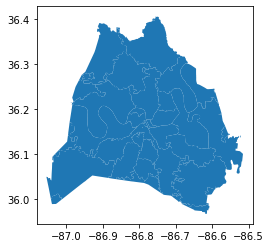

In [26]:
zipcodes.plot()

In [27]:
work.to_csv("houses&schools_2.csv")

In [28]:
#work_zipcodes.to_csv("workcodes.csv")

In [29]:
hs=pd.read_csv("houses&schools.csv")
hs

,Unnamed: 0,propertyType,lotAreaValue,address,price,longitude,latitude,listingStatus,zpid,listingSubType,...,distance,assigned,name,studentsPerTeacher,isAssigned,size,level,grades,type,zip
0,0,SINGLE_FAMILY,1.03,"415 Westchester Dr, Madison, TN 37115",275000.0,-86.735620,36.262100,FOR_SALE,41058092,True,...,1.2,NaN,Madison Middle Prep,14,True,554,Elementary,5-8,Public,37115.0
1,1,SINGLE_FAMILY,1.03,"415 Westchester Dr, Madison, TN 37115",275000.0,-86.735620,36.262100,FOR_SALE,41058092,True,...,1.5,NaN,Hunters Lane Comp High School,17,True,1324,High,9-12,Public,37115.0
2,2,SINGLE_FAMILY,1.03,"415 Westchester Dr, Madison, TN 37115",275000.0,-86.735620,36.262100,FOR_SALE,41058092,True,...,1.2,NaN,Madison Middle Prep,14,True,554,Elementary,5-8,Public,37115.0
3,3,SINGLE_FAMILY,1.03,"415 Westchester Dr, Madison, TN 37115",275000.0,-86.735620,36.262100,FOR_SALE,41058092,True,...,1.5,NaN,Hunters Lane Comp High School,17,True,1324,High,9-12,Public,37115.0
4,4,SINGLE_FAMILY,9147.60,"1804 Brookmeadow Ln, Hermitage, TN 37076",419000.0,-86.590800,36.217957,FOR_SALE,54448854,True,...,3.9,NaN,Dupont Hadley Middle School,17,True,642,Elementary,5-8,Public,37076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,SINGLE_FAMILY,8712.00,"4127 Barnes Cove Ct, Antioch, TN 37013",550000.0,-86.701090,36.026993,FOR_SALE,71265125,True,...,5.4,NaN,John Overton Comp High School,16,True,1944,High,9-12,Public,37013.0
89,89,SINGLE_FAMILY,0.30,"6413 Riverplace Dr, Nashville, TN 37221",699000.0,-87.003746,36.085426,FOR_SALE,71257224,True,...,8.8,NaN,H G Hill Middle School,17,True,689,Elementary,5-8,Public,37221.0
90,90,SINGLE_FAMILY,0.30,"6413 Riverplace Dr, Nashville, TN 37221",699000.0,-87.003746,36.085426,FOR_SALE,71257224,True,...,8.4,NaN,Hillwood Comp High School,17,True,1107,High,9-12,Public,37221.0
91,91,SINGLE_FAMILY,1.14,"949 Plateau Pkwy, Nashville, TN 37205",975000.0,-86.907364,36.123363,FOR_SALE,41138665,True,...,2.6,NaN,H G Hill Middle School,17,True,689,Elementary,5-8,Public,37205.0


In [30]:
hs2=pd.read_csv("houses&schools_2.csv")
hs2

,Unnamed: 0,propertyType,lotAreaValue,address,price,longitude,latitude,listingStatus,zpid,listingSubType,...,distance,assigned,name,studentsPerTeacher,isAssigned,size,level,grades,type,zip
0,0,SINGLE_FAMILY,1.46,"1015 Tulip Grove Rd, Hermitage, TN 37076",425000,-86.59299,36.187960,FOR_SALE,41108405,True,...,1.4,NaN,Dupont Tyler Middle School,18,True,590,Elementary,5-8,Public,37076.0
1,1,SINGLE_FAMILY,1.46,"1015 Tulip Grove Rd, Hermitage, TN 37076",425000,-86.59299,36.187960,FOR_SALE,41108405,True,...,5.4,NaN,Mcgavock Comp High School,18,True,2292,Middle,8-12,Public,37076.0
2,2,SINGLE_FAMILY,6969.60,"5902 Morrow Rd, Nashville, TN 37209",499900,-86.85982,36.161920,FOR_SALE,41112643,True,...,1.8,NaN,Mckissack Middle School,14,True,308,Elementary,5-8,Public,37209.0
3,3,SINGLE_FAMILY,6969.60,"5902 Morrow Rd, Nashville, TN 37209",499900,-86.85982,36.161920,FOR_SALE,41112643,True,...,2.8,NaN,Pearl Cohn Magnet High School,13,True,588,High,9-12,Public,37209.0
4,4,SINGLE_FAMILY,1.50,"112 High Estes, Nashville, TN 37215",3390000,-86.84064,36.091423,FOR_SALE,67620536,True,...,2.4,NaN,John T. Moore Middle School,17,True,760,Elementary,5-8,Public,37215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,579,SINGLE_FAMILY,NaN,"The Brookemeade Plan, Parkhaven",549990,-86.63733,36.195103,FOR_SALE,2073572052,True,...,2.7,NaN,Mcgavock Comp High School,18,True,2292,Middle,8-12,Public,NaN
580,580,SINGLE_FAMILY,0.25,"2710 Delaware Ave, Nashville, TN 37209",775000,-86.81773,36.156563,FOR_SALE,41116727,True,...,0.9,NaN,Mckissack Middle School,14,True,308,Elementary,5-8,Public,37209.0
581,581,SINGLE_FAMILY,0.25,"2710 Delaware Ave, Nashville, TN 37209",775000,-86.81773,36.156563,FOR_SALE,41116727,True,...,0.5,NaN,Pearl Cohn Magnet High School,13,True,588,High,9-12,Public,37209.0
582,582,SINGLE_FAMILY,8276.40,"1742 17th Ave N, Nashville, TN 37208",975000,-86.81030,36.179546,FOR_SALE,41098072,True,...,0.6,NaN,John Early Paideia Middle Magnet,14,True,275,Elementary,5-8,Public,37208.0


In [31]:
hs3=pd.concat([hs, hs2])
hs3

,Unnamed: 0,propertyType,lotAreaValue,address,price,longitude,latitude,listingStatus,zpid,listingSubType,...,distance,assigned,name,studentsPerTeacher,isAssigned,size,level,grades,type,zip
0,0,SINGLE_FAMILY,1.03,"415 Westchester Dr, Madison, TN 37115",275000.0,-86.73562,36.262100,FOR_SALE,41058092,True,...,1.2,NaN,Madison Middle Prep,14,True,554,Elementary,5-8,Public,37115.0
1,1,SINGLE_FAMILY,1.03,"415 Westchester Dr, Madison, TN 37115",275000.0,-86.73562,36.262100,FOR_SALE,41058092,True,...,1.5,NaN,Hunters Lane Comp High School,17,True,1324,High,9-12,Public,37115.0
2,2,SINGLE_FAMILY,1.03,"415 Westchester Dr, Madison, TN 37115",275000.0,-86.73562,36.262100,FOR_SALE,41058092,True,...,1.2,NaN,Madison Middle Prep,14,True,554,Elementary,5-8,Public,37115.0
3,3,SINGLE_FAMILY,1.03,"415 Westchester Dr, Madison, TN 37115",275000.0,-86.73562,36.262100,FOR_SALE,41058092,True,...,1.5,NaN,Hunters Lane Comp High School,17,True,1324,High,9-12,Public,37115.0
4,4,SINGLE_FAMILY,9147.60,"1804 Brookmeadow Ln, Hermitage, TN 37076",419000.0,-86.59080,36.217957,FOR_SALE,54448854,True,...,3.9,NaN,Dupont Hadley Middle School,17,True,642,Elementary,5-8,Public,37076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,579,SINGLE_FAMILY,NaN,"The Brookemeade Plan, Parkhaven",549990.0,-86.63733,36.195103,FOR_SALE,2073572052,True,...,2.7,NaN,Mcgavock Comp High School,18,True,2292,Middle,8-12,Public,NaN
580,580,SINGLE_FAMILY,0.25,"2710 Delaware Ave, Nashville, TN 37209",775000.0,-86.81773,36.156563,FOR_SALE,41116727,True,...,0.9,NaN,Mckissack Middle School,14,True,308,Elementary,5-8,Public,37209.0
581,581,SINGLE_FAMILY,0.25,"2710 Delaware Ave, Nashville, TN 37209",775000.0,-86.81773,36.156563,FOR_SALE,41116727,True,...,0.5,NaN,Pearl Cohn Magnet High School,13,True,588,High,9-12,Public,37209.0
582,582,SINGLE_FAMILY,8276.40,"1742 17th Ave N, Nashville, TN 37208",975000.0,-86.81030,36.179546,FOR_SALE,41098072,True,...,0.6,NaN,John Early Paideia Middle Magnet,14,True,275,Elementary,5-8,Public,37208.0


In [33]:
hs3.to_csv("houses&schools3.csv")